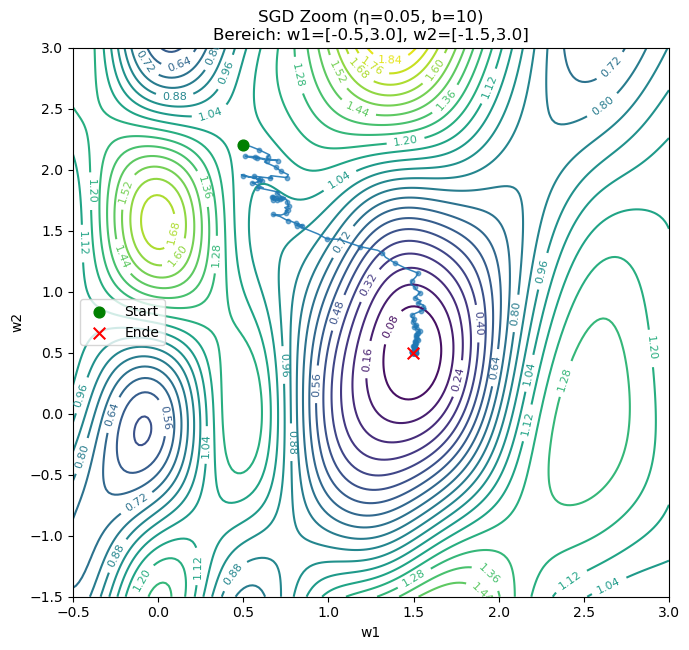

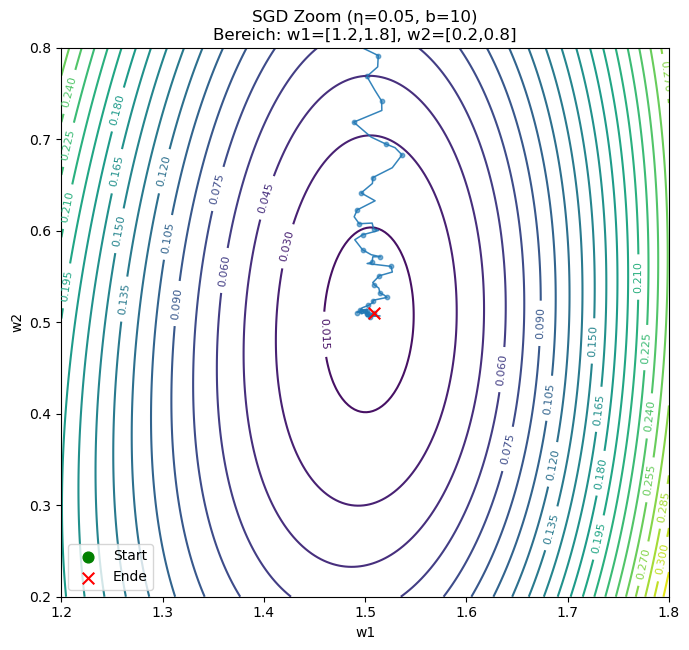

In [72]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(12345)

n_samples = 150
X_data = rng.uniform(-4, 4, n_samples)
# Wahres Modell: y = sin(1.5 * x + 0.5)
y_data = np.sin(1.5 * X_data + 0.5) + rng.normal(0, 0.1, n_samples)

def model_func(x, w):
    return np.sin(w[0] * x + w[1])

def get_full_loss(w):
    """Gesamt-MSE für die Konturlinien."""
    preds = model_func(X_data, w)
    return np.mean((preds - y_data)**2)

def get_batch_gradient(w, batch_indices):
    """Analytischer Gradient auf einem Mini-Batch."""
    xi = X_data[batch_indices]
    yi = y_data[batch_indices]
    
    preds = model_func(xi, w)
    error = preds - yi
    cos_part = np.cos(w[0] * xi + w[1])
    
    grad_w1 = np.mean(2 * error * cos_part * xi)
    grad_w2 = np.mean(2 * error * cos_part)
    return np.array([grad_w1, grad_w2])

def train_sgd(w_start, eta=0.05, steps=100, batch_size=50):
    w = w_start.copy()
    ws = [w.copy()]
    for _ in range(steps):
        # Zufälliger Batch erzeugt das gewünschte SGD-Rauschen
        indices = rng.choice(n_samples, size=batch_size, replace=False)
        g = get_batch_gradient(w, indices)
        w = w - eta * g
        ws.append(w.copy())
    return np.asarray(ws)

def plot_complex_regression_sgd(
    w_start=np.array([0.5, 2.2]),
    eta=0.05,
    steps=100,
    batch_size=50,
    W1=np.linspace(-0.5, 3, 200),
    W2=np.linspace(-1.5, 3, 200)
):
    path = train_sgd(w_start, eta=eta, steps=steps, batch_size=batch_size)

    G1, G2 = np.meshgrid(W1, W2)
    L = np.zeros_like(G1)
    for i in range(G1.shape[0]):
        for j in range(G1.shape[1]):
            L[i, j] = get_full_loss(np.array([G1[i, j], G2[i, j]]))

    plt.figure(figsize=(7, 6.6))
    
    # --- FIX: Achsenbegrenzung explizit setzen ---
    plt.xlim(W1.min(), W1.max())
    plt.ylim(W2.min(), W2.max())
    
    # Klassischer Konturplot mit Labeln
    cs = plt.contour(G1, G2, L, levels=26)
    plt.clabel(cs, inline=True, fontsize=8)

    # Pfad zeichnen (Linie + Scatter)
    plt.plot(path[:, 0], path[:, 1], linewidth=1.1, alpha=0.9, color='tab:blue')
    
    # Marker nur alle paar Schritte
    mark_every = max(1, steps // 100)
    sel = np.arange(0, len(path), mark_every)
    plt.scatter(path[sel, 0], path[sel, 1], s=10, alpha=0.6, color='tab:blue')

    # Start/Ende (werden nur angezeigt, wenn sie im Zoom-Bereich liegen)
    plt.scatter([path[0, 0]], [path[0, 1]], s=60, marker='o', color='green', label='Start', zorder=5)
    plt.scatter([path[-1, 0]], [path[-1, 1]], s=70, marker='x', color='red', label='Ende', zorder=5)

    plt.xlabel("w1")
    plt.ylabel("w2")
    plt.title(f"SGD Zoom (η={eta}, b={batch_size})\nBereich: w1=[{W1.min()},{W1.max()}], w2=[{W2.min()},{W2.max()}]")
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Mit batch_size=1 oder 2 sieht man das typische SGD-Zickzack sehr gut
    plot_complex_regression_sgd(eta=0.05, batch_size=10, steps=200)
    plot_complex_regression_sgd(eta=0.05, batch_size=10, steps=200, W1=np.linspace(1.2, 1.8, 200), W2=np.linspace(0.2, 0.8, 250))